In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("Fish_dataset.csv")
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


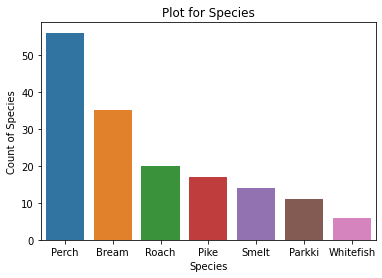

In [6]:
# 1. Plot a bar chart showing count of individual species?

sp = pd.DataFrame(df["Species"].value_counts())

sns.barplot(x=sp.index,y=sp["Species"])
plt.xlabel("Species")
plt.ylabel("Count of Species")
plt.title("Plot for Species")
plt.show()

In [4]:
# 2. Identify outliers and remove if any?

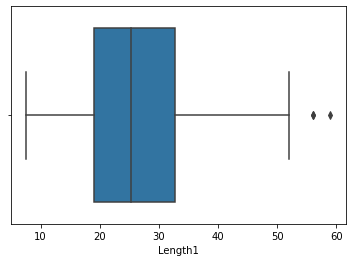

In [7]:
sns.boxplot(x=df["Length1"])
plt.show()

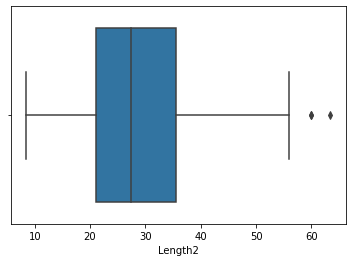

In [8]:
sns.boxplot(x=df["Length2"])
plt.show()

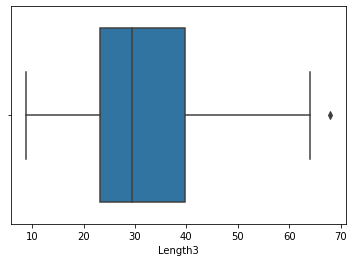

In [9]:
sns.boxplot(x=df["Length3"])
plt.show()

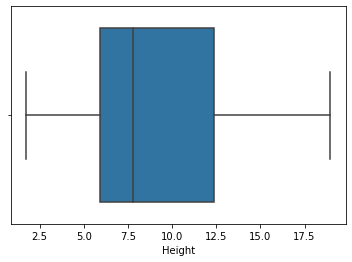

In [10]:
sns.boxplot(x=df["Height"])
plt.show()

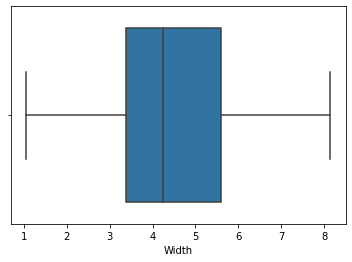

In [11]:
sns.boxplot(x=df["Width"])
plt.show()

In [12]:
len_ver = df["Length1"]

# IQR = Q3 - Q1
# MIN = Q1 - 1.5 *(IQR)
# MAX = Q3 + 1.5 * (IQR)

ver_Q1 = len_ver.quantile(0.25)
ver_Q3 = len_ver.quantile(0.75)

ver_IQR = ver_Q3 - ver_Q1

ver_min = ver_Q1 - 1.5 * (ver_IQR)
ver_max = ver_Q3 + 1.5 * (ver_IQR)

len_ver[(len_ver > ver_max) | (len_ver < ver_min)]

142    56.0
143    56.0
144    59.0
Name: Length1, dtype: float64

In [13]:
len_dig = df["Length2"]

# IQR = Q3 - Q1
# MIN = Q1 - 1.5 *(IQR)
# MAX = Q3 + 1.5 * (IQR)

dig_Q1 = len_dig.quantile(0.25)
dig_Q3 = len_dig.quantile(0.75)

dig_IQR = dig_Q3 - dig_Q1

dig_min = dig_Q1 - 1.5 * (dig_IQR)
dig_max = dig_Q3 + 1.5 * (dig_IQR)

len_dig[(len_dig > dig_max) | (len_dig < dig_min)]

142    60.0
143    60.0
144    63.4
Name: Length2, dtype: float64

In [14]:
len_cross = df["Length3"]

# IQR = Q3 - Q1
# MIN = Q1 - 1.5 *(IQR)
# MAX = Q3 + 1.5 * (IQR)

cross_Q1 = len_cross.quantile(0.25)
cross_Q3 = len_cross.quantile(0.75)

cross_IQR = dig_Q3 - dig_Q1

cross_min = cross_Q1 - 1.5 * (cross_IQR)
cross_max = cross_Q3 + 1.5 * (cross_IQR)

len_cross[(len_cross > cross_max) | (len_cross < cross_min)]

142    64.0
143    64.0
144    68.0
Name: Length3, dtype: float64

In [14]:
heg = data["Height"]

# IQR = Q3 - Q1
# MIN = Q1 - 1.5 *(IQR)
# MAX = Q3 + 1.5 * (IQR)

heg_Q1 = heg.quantile(0.25)
heg_Q3 = heg.quantile(0.75)

heg_IQR = heg_Q3 - heg_Q1

heg_min = heg_Q1 - 1.5 * (heg_IQR)
heg_max = heg_Q3 + 1.5 * (heg_IQR)

heg[(heg > dig_max) | (heg < dig_min)]

Series([], Name: Height, dtype: float64)

In [15]:
wid = df["Width"]

# IQR = Q3 - Q1
# MIN = Q1 - 1.5 *(IQR)
# MAX = Q3 + 1.5 * (IQR)

wid_Q1 = len_dig.quantile(0.25)
wid_Q3 = len_dig.quantile(0.75)

wid_IQR = dig_Q3 - dig_Q1

wid_min = dig_Q1 - 1.5 * (dig_IQR)
wid_max = dig_Q3 + 1.5 * (dig_IQR)

wid[(wid > wid_max) | (wid < wid_min)]

Series([], Name: Width, dtype: float64)

In [16]:
data.drop([142,143,144],inplace = True)

In [16]:
df.rename(columns= {'Length1':'Len_Vert', 'Length2':'Len_Diag', 'Length3':'Len_Cross'}, inplace=True)


In [17]:
# 3. Build a regression model and print regression equation?

X = df.iloc[ : , 2: ]
Y = df.iloc[ : ,1]



from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=0)



In [19]:
print("X_train",X_train.shape)
print("Y_train",Y_train.shape)
print("X_test",X_test.shape)
print("Y_test",Y_test.shape)

X_train (124, 5)
Y_train (124,)
X_test (32, 5)
Y_test (32,)


In [19]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X_train,Y_train)

LinearRegression()

In [20]:
print(lin_reg.coef_)
print(lin_reg.intercept_)

[ 80.38246172 -23.91313616 -31.52808371  32.21045103  24.0330976 ]
-446.1173994833815


In [21]:
print('y = ' + str('%.2f' % lin_reg.intercept_) + ' + ' + str('%.2f' % lin_reg.coef_[0]) + '*X1 ' + str('%.2f' % lin_reg.coef_[1]) + '*X2 ' +
      str('%.2f' % lin_reg.coef_[2]) + '*X3 + ' + str('%.2f' % lin_reg.coef_[3]) + '*X4 + ' + str('%.2f' % lin_reg.coef_[4]) + '*X5')

y = -446.12 + 80.38*X1 -23.91*X2 -31.53*X3 + 32.21*X4 + 24.03*X5


In [23]:
# 4. What is the mean score of the model at 95% confidence interval?

y_pred =  lin_reg.predict(X_test)
y_pred


from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(y_pred,Y_test)
print("Function MSE",lin_mse)


lin_man = sum(((y_pred - Y_test) ** 2)/len(y_pred))
print("Manual MSE",lin_man)

from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(y_pred,Y_test)
print("MAE",MAE)


from sklearn.metrics import r2_score

r2 = r2_score(y_pred,Y_test)
print("R Square ",r2)

Function MSE 26027.71502977764
Manual MSE 26027.71502977764
MAE 107.79739817234815
R Square  0.7569124504194322


In [ ]:
# 5. Compare real and predicted weights and give a conclusion statement based on it?

In [24]:
y_pred1 = pd.DataFrame(y_pred, columns=['Estimated Weight'])
y_pred1.head()


,Estimated Weight
0,472.383172
1,161.208216
2,223.588604
3,184.379614
4,634.221025


In [25]:
y_test1 = pd.DataFrame(Y_test)
y_test1 = y_test1.reset_index(drop=True)
y_test1.head()

,Weight
0,390.0
1,0.0
2,170.0
3,160.0
4,556.0


In [27]:
output = pd.concat([y_test1, y_pred1], axis=1)
output

,Weight,Estimated Weight
0,390.0,472.383172
1,0.0,161.208216
2,170.0,223.588604
3,160.0,184.379614
4,556.0,634.221025
5,900.0,783.032401
6,800.0,680.638817
7,300.0,503.575004
8,975.0,895.022203
9,115.0,139.686445


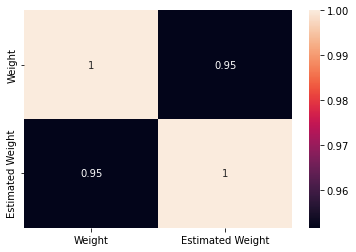

In [28]:
sns.heatmap(output.corr(),annot=True)
plt.show()

In [29]:
# Conclusion: From the results above, one can see there is a tendency towards errorous estimations when the weight is small